In [2]:
import pandas as pd
from DataLoader import load_df, save_df
from TrainTestSignalCreator import TrainTestSignalCreator
from scipy.signal import butter
from scipy.signal import medfilt
from matplotlib import pyplot as plt
from DataLoaderNewSplitter import split_long_signals
import numpy as np

/Users/valeria.guryanova/anaconda3/lib/python3.8/site-packages/tqdm/std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline

In [4]:
df = load_df("alivecor")

In [5]:
df.head()

,fs,base_time,sig_name,comments,id,target,ECG
0,300,05:05:15,ECG,NaN,A00001,N,"[-0.127, -0.162, -0.197, -0.229, -0.245, -0.25..."
1,300,11:05:25,ECG,NaN,A00002,N,"[0.128, 0.157, 0.189, 0.226, 0.25, 0.257, 0.26..."
2,300,12:04:05,ECG,NaN,A00003,N,"[0.056, 0.073, 0.085, 0.093, 0.1, 0.107, 0.113..."
3,300,11:05:48,ECG,NaN,A00004,A,"[0.519, 0.619, 0.723, 0.827, 0.914, 0.956, 0.9..."
4,300,08:12:08,ECG,NaN,A00005,O,"[-0.188, -0.239, -0.274, -0.316, -0.356, -0.37..."


In [6]:
s = TrainTestSignalCreator(df, "ECG", "target", 300, 3000)

qqq


In [7]:
def filter_aq(x):
    m = medfilt(x, kernel_size=107)
    x_p = x - m
    return x_p

In [8]:
s.create_filtered_signal(filter_aq, num_processes=12)

Process ForkPoolWorker-10:
Process ForkPoolWorker-4:
Traceback (most recent call last):
  File "/Users/valeria.guryanova/anaconda3/lib/python3.8/site-packages/multiprocess/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/valeria.guryanova/anaconda3/lib/python3.8/site-packages/multiprocess/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/valeria.guryanova/anaconda3/lib/python3.8/site-packages/multiprocess/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/Users/valeria.guryanova/anaconda3/lib/python3.8/site-packages/multiprocess/pool.py", line 48, in mapstar
    return list(map(*args))
  File "<ipython-input-7-1b30efe702a4>", line 2, in filter_aq
    m = medfilt(x, kernel_size=107)
Process ForkPoolWorker-12:
  File "/Users/valeria.guryanova/anaconda3/lib/python3.8/site-packages/scipy/signal/signaltools.py", line 1403, in medfilt
    return sigtools._order_filterND(volume, domain, order)
KeyboardInte

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(0, 2000), s.df["ECG"][0][:2000])

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(0, 2000), s.df["ECG_F"][0][:2000])

In [ ]:
s.calculate_r_peaks(15)

In [ ]:
s.save_df("full_df_alive_cor")

In [160]:
full_df = load_df("full_df_alive_cor")
full_df["patient_id"] = full_df.index.copy()

In [161]:
full_df = split_long_signals(full_df, 3000, 9000, "ECG_F", rpeaks=True)

here1



here


In [162]:
full_df['ECG_F'] = full_df['ECG_F'].apply(lambda x: np.array(x))
full_df['rpeaks'] = full_df['rpeaks'].apply(lambda x: np.array(x))

In [163]:
full_df["cardiogram_id"] = full_df["patient_id"].copy()

In [164]:
s = TrainTestSignalCreator(full_df, "ECG_F", "target", 300, 3000)

qqq


In [165]:
full_df.shape

(9646, 13)

In [166]:
s.make_ttv_split(0.23, 0.3, True)

[0.09032652 0.60436375 0.29996948 0.00534025] [0.09090909 0.60367722 0.29979571 0.00561798] [0.09099475 0.59227352 0.31188585 0.00484587] [0.09066306 0.59224177 0.31168245 0.00541272]
[0.09047308 0.60431655 0.30019621 0.00501417] [0.08998475 0.60447382 0.29944077 0.00610066] [0.09131103 0.59207997 0.31199539 0.00461361] [0.09025595 0.59272564 0.31163    0.00538841]
train_shape (5202, 13)
test_shape (2217, 13)
validation_shape (2227, 13)
set()
set()
set()
train
N    0.592080
O    0.311995
A    0.091311
~    0.004614
Name: target, dtype: float64
test
N    0.592242
O    0.311682
A    0.090663
~    0.005413
Name: target, dtype: float64
val
N    0.592726
O    0.311630
A    0.090256
~    0.005388
Name: target, dtype: float64


In [167]:
add_columns = ['fs', 'target', 'SignalLen', "comments", "cardiogram_id"]

In [168]:
s.save_ttv(add_columns, "alive_cor", filtered=True)

['ECG_F', 'rpeaks']


# Фильтрация сигналов

In [135]:
train = load_df("train_alive_cor/")
test = load_df("test_alive_cor/")
val = load_df("val_alive_cor/")


In [136]:
train[train["SignalLen"]>9000].shape

(0, 7)

In [137]:
print(train.shape)
print(test.shape)
print(val.shape)

(5202, 7)
(2217, 7)
(2227, 7)


In [138]:
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)
val.reset_index(inplace=True, drop=True)

train["old_index"] = train.index.copy()
test["old_index"] = test.index.copy()
val["old_index"] = val.index.copy()

In [139]:
#train["cardiogram_id"] = train.index.copy()
#test["cardiogram_id"] = test.index.copy()
#val["cardiogram_id"] = val.index.copy()

In [140]:
#train = split_long_signals(train, 3000, 9000, "ECG_F", rpeaks=True)
#test = split_long_signals(test, 3000, 9000, "ECG_F", rpeaks=True)
#val = split_long_signals(val, 3000, 9000, "ECG_F", rpeaks=True)

In [141]:
train["SignalLen"] = train.ECG_F.apply(lambda x: len(x))
test["SignalLen"] = test.ECG_F.apply(lambda x: len(x))
val["SignalLen"] = val.ECG_F.apply(lambda x: len(x))

In [142]:
train["rpeaks"] = train.rpeaks.apply(lambda x: np.array(x))
test["rpeaks"] = test.rpeaks.apply(lambda x: np.array(x))
val["rpeaks"] = val.rpeaks.apply(lambda x: np.array(x))

In [143]:
test["rpeaks"].apply(lambda x: len(x)).median()

35.0

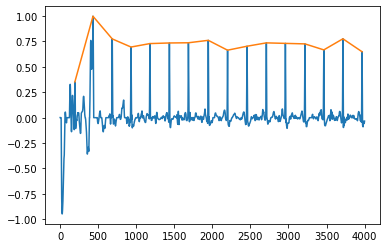

In [144]:
df = val
s_b = 0
s_len = 4000
s_ind = 80

cut_rpeaks = df["rpeaks"][s_ind][(df["rpeaks"][s_ind] <= s_len) & (df["rpeaks"][s_ind] >= s_b)]
plt.plot(range(s_b, s_len), df["ECG_F"][s_ind][s_b:s_len])
plt.plot(cut_rpeaks, [df["ECG_F"][s_ind][i] for i in cut_rpeaks])

In [145]:
train["target"].value_counts()

N    3080
O    1623
A     475
~      24
Name: target, dtype: int64

In [146]:
train["lenrpeaks"] = train["rpeaks"].apply(lambda x: len(x))
test["lenrpeaks"] = test["rpeaks"].apply(lambda x: len(x))
val["lenrpeaks"] = val["rpeaks"].apply(lambda x: len(x))

In [147]:
def del_bad_signals(df):
    df = df.copy()
    
    df = df[df["lenrpeaks"] > 20].copy()
    df.reset_index(inplace=True, drop=True)
    return df

train = del_bad_signals(train)
test = del_bad_signals(test)
val = del_bad_signals(val)

In [148]:
train["diff_r_peaks"] = train["rpeaks"].apply(lambda x: np.diff(x))
test["diff_r_peaks"] = test["rpeaks"].apply(lambda x: np.diff(x))
val["diff_r_peaks"] = val["rpeaks"].apply(lambda x: np.diff(x))

train["max_diff_r_peaks"] = train["diff_r_peaks"].apply(lambda x: np.max(x))
test["max_diff_r_peaks"] = test["diff_r_peaks"].apply(lambda x: np.max(x))
val["max_diff_r_peaks"] = val["diff_r_peaks"].apply(lambda x: np.max(x))

def count_signal_points(df):
    df = df.copy()
    df["num_bad_peaks"] = df["diff_r_peaks"].apply(lambda x: len(list(filter(lambda x: (x > 400 ) or (x < 100), x))))
    return df
train = count_signal_points(train)
test = count_signal_points(test)
val = count_signal_points(val)

In [149]:
train["pr_bad_peaks"] = train["num_bad_peaks"] / train["lenrpeaks"]
test["pr_bad_peaks"] = test["num_bad_peaks"] / test["lenrpeaks"]
val["pr_bad_peaks"] = val["num_bad_peaks"] / val["lenrpeaks"]

In [150]:
print(train[train["pr_bad_peaks"] > 0.55].shape)
print(test[test["pr_bad_peaks"] > 0.55].shape)
print(val[val["pr_bad_peaks"] > 0.55].shape)

(25, 13)
(6, 13)
(12, 13)


In [151]:
def del_signals_with_bad_peaks(df):
    df = df.copy()
    df = df[df["pr_bad_peaks"] <= 0.55].copy()
    df.reset_index(inplace=True, drop=True)
    return df

In [152]:
train = del_signals_with_bad_peaks(train)
test = del_signals_with_bad_peaks(test)
val = del_signals_with_bad_peaks(val)

In [153]:
test["target"].value_counts()

N    1227
O     643
A     179
~      11
Name: target, dtype: int64

## Формирование изображений и сигналов для классификации

In [155]:
from scipy.signal import resample, resample_poly, decimate

In [ ]:
resample

In [179]:
train["ECG_R"] = train.ECG_F.apply(lambda x: decimate(x, 10)) 
test["ECG_R"] = test.ECG_F.apply(lambda x: decimate(x, 10))
val["ECG_R"] = val.ECG_F.apply(lambda x: decimate(x, 10))

In [180]:
train["RSignalLen"] = train["ECG_R"].apply(lambda x: len(x))
test["RSignalLen"] = test["ECG_R"].apply(lambda x: len(x))
val["RSignalLen"] = val["ECG_R"].apply(lambda x: len(x))

In [181]:
train["RSignalLen"].max()

900

In [182]:
def norm_signal(x):
    return (x - x.min()) / (x.max() - x.min()) * 2 - 1

In [183]:
train["RECG_N"] = train.ECG_R.apply(lambda x: norm_signal(x)) 
test["RECG_N"] = test.ECG_R.apply(lambda x: norm_signal(x))
val["RECG_N"] = val.ECG_R.apply(lambda x: norm_signal(x))

In [184]:
def create_signal_image(signal, n_rows= 75, n_points = 4000, dpi=64, figsize=(17,17), slice_size=1000):
    fig, ax = plt.subplots(nrows=n_rows, dpi=dpi,figsize=figsize )
    for k in range(n_rows):
        ax[k].axis('off')
        ax[k].plot(signal[n_points * k:n_points * (k+1)])
    fig.tight_layout()
    fig.canvas.draw()
    
    X = np.array(fig.canvas.renderer.buffer_rgba())
    plt.close(fig)
    return X

In [185]:
train[train["RSignalLen"] < 4500].index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4827, 4828, 4829, 4830, 4831, 4832, 4833, 4834, 4835, 4836],
           dtype='int64', length=4837)

In [186]:
ind = 15
train["RSignalLen"][ind]

900

In [187]:
ind = 12
train["RECG_N"][ind].shape
X = create_signal_image(train["RECG_N"][ind], n_rows = 7, n_points=100, dpi=70)

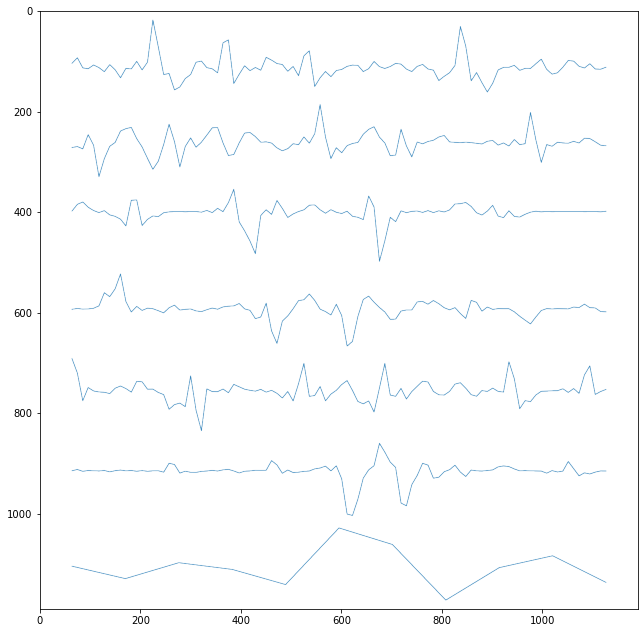

In [188]:
plt.figure(figsize=(11,11))
plt.imshow(X)

In [189]:
train["index"] = train.index
test["index"] = test.index
val["index"] = val.index

In [190]:
train["label"] = train.target
test["label"] = test.target
val["label"] = val.target

In [191]:
train["path"] = train["index"].apply(lambda x: "train_alive_images"+"/"+str(x))
test["path"] = test["index"].apply(lambda x: "test_alive_images"+"/"+str(x))
val["path"] = val["index"].apply(lambda x: "val_alive_images"+"/"+str(x))

In [192]:
train[['index', 'label', 'path', 'RSignalLen', 'cardiogram_id']].to_csv("alive_image_train.csv", index=False)
test[['index', 'label', 'path', 'RSignalLen', 'cardiogram_id']].to_csv("alive_image_test.csv", index=False)
val[['index', 'label', 'path', 'RSignalLen', 'cardiogram_id']].to_csv("alive_val.csv", index=False)

In [193]:
def create_and_save_image(image, signal_id, path):
    x = create_signal_image(image, n_rows = 7, n_points=645, dpi=70)
    with open(path+"/"+str(signal_id)+".npy", "wb") as f:
        np.save(f, x)
    del x

In [194]:
import multiprocess as mp

In [309]:
def create_image_mp(x):
    create_and_save_image(x[0], x[1], "train_alive_images")

with mp.Pool(20) as mp_pool:
    mp_pool.map(create_image_mp, zip(train["RECG_N"].values[:6000], train["index"].values[:6000]))

Process ForkPoolWorker-36:
Process ForkPoolWorker-22:
Process ForkPoolWorker-37:
Process ForkPoolWorker-23:
Process ForkPoolWorker-35:
Process ForkPoolWorker-27:
Process ForkPoolWorker-34:
Process ForkPoolWorker-21:
Process ForkPoolWorker-38:
Process ForkPoolWorker-30:
Process ForkPoolWorker-32:
Process ForkPoolWorker-31:
Process ForkPoolWorker-26:
Process ForkPoolWorker-40:
Process ForkPoolWorker-29:
Process ForkPoolWorker-39:
Process ForkPoolWorker-33:
Process ForkPoolWorker-28:
Process ForkPoolWorker-24:
Process ForkPoolWorker-25:


KeyboardInterrupt: 

In [ ]:
def create_image_mp(x):
    create_and_save_image(x[0], x[1], "test_alive_images")

with mp.Pool(20) as mp_pool:
    mp_pool.map(create_image_mp, zip(test["RECG_N"].values, test["index"].values))

In [ ]:
def create_image_mp(x):
    create_and_save_image(x[0], x[1], "val_alive_images")

with mp.Pool(20) as mp_pool:
    mp_pool.map(create_image_mp, zip(val["RECG_N"].values, val["index"].values))

In [ ]:
test["diff_r_peaks"][0]

In [195]:
train.to_parquet('train_alive_filtered.parquet')
test.to_parquet('test_alive_filtered.parquet')
val.to_parquet('val_alive_filtered.parquet')

In [311]:
train.shape

(4837, 19)

In [312]:
test.shape

(2060, 19)